<a href="https://colab.research.google.com/github/urusha-shrestha/Practical-Statistics-for-Data-Scientists/blob/main/Chapter_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 1: Exploratory Data Analysis** #

## Elements of Structured Data ##

Structured Data : data that can be broken down into tabular form

1. Numerical : data that can be expressed on a numeric scale
  
  1.1 Continuous : data that can take on any value in an interval. numerical data that can be infinitely divided. (eg: weight, height)
  
  1.2 Discrete : data that can only take integer values. numerical data that cannot be divided.(eg: year of birth)
2. Categorical : data that can take on a specific set of values representing a set of possible categories
  
  2.1 Binary : a special case of categorical data with just two categories
  
  2.2 Ordinal : categorical data that has ordering. data where order matters. (eg: rank in class)


## Rectangular Data ##
* refers to a two dimensional matrix where rows indicate records and column indicates features
* like data in a spreadsheet, or a dataframe
* dataframe is the basic data structure for statistical and machine learning models
* features refer to columns within a table and records refer individual rows in a table

##Non Rectangular Data Structures##
Some types of non rectangular data structures are:
* Time series data
* Spatial data structures
* Graph data structures


In [ ]:
pip install wquantiles

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
import wquantiles
from statistics import variance
from statistics import stdev
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


##Estimates of Location##
* an estimate of where most of the data is located
* central tendency
* Mean, Weighted mean, Median, Percentile, Weighted median, Trimmed mean, Outlier

1. Mean :
* the sum of all values divided by the number of values. (average)
* very sensitive to outliers

In [ ]:
df['PetalWidthCm'].mean()

1.1986666666666668

2. Weighted Mean:
* Multiply every value by some weight x, and then summing them up and dividing it by the number of values. (weighted average)
* useful when some numbers in the dataset are more important or carry more weight than others
* eg: final grades are calculated by the different weights or percentages of  assignments or exams that they carry

In [ ]:
#weighted mean using numpy
np.average(df['PetalWidthCm'],weights=df['SepalWidthCm'])

1.1602925125518444

3. Trimmed Mean:
* removing x% or x values from the top and bottom of the dataset and then calculating the mean. (truncated mean)
* helps reduce the impact of outliers

In [ ]:
trim_mean(df['PetalWidthCm'],0.2)
#slices top and bottom 20% of the data

1.2022222222222223

4. Median:
* the middle value
* 50th percentile
* median may be a better metric for location in cases where the data is skewed
* not sensitive to outliers/ robust to outliers

In [ ]:
df['PetalWidthCm'].median()

1.3

5. Weighted Median:
* multiply every value with some weight x, then pick the middle value such that the sum of values to the left of the median is the same as the sum of values to the right of the median
* robust to outliers

In [ ]:
wquantiles.median(df['PetalWidthCm'],df['SepalWidthCm'])

1.3

6. Percentile:
* the value such that P percent of the data lies below it


In [ ]:
np.percentile(df['PetalWidthCm'],75)

1.8

7. Outliers:
* a value that is very different from the rest of the data

##Estimates of Variability##
* an estimate of how the data is distributed
* dispersion
* measures whether the data values are tightly clustered or spread out
* heart of statistics
* Deviations, Variance, Standart Deviation, Mean absolute deviation, Median absolute deviation from the median, Range, Order Statistics, Percentile, Interquartile range

1. Deviations:
* difference between the observed value and the estimate of location
* also called errors or residuals
* tells us how dispersed the data is around the central value

2. Variance:
* sum of squared deviations from the mean divided by n-1 where n is the number of data values
* mean-squared error
* susceptible to outliers

In [ ]:
variance(df['PetalWidthCm'])

0.582414317673378

3. Standard Deviation:
* square root of the variance
* susceptible to outliers

In [ ]:
stdev(df['PetalWidthCm'])

0.7631607417008411

4. Mean Absoulte Deviation:
* mean of the absolute values of the deviations from the mean
* Manhattan norm
* l1 norm
* not robust to outliers

In [ ]:
np.mean(np.absolute(df['PetalWidthCm']-np.mean(df['PetalWidthCm'])))

0.6589333333333334

5. Median Absolute Deviation from the Median:
* median of the absolute values of the deviations form the median
* robust to outliers

In [ ]:
np.median(np.absolute(df['PetalWidthCm']-np.median(df['PetalWidthCm'])))

0.7

6. Range:
* difference between the largest and the smallest values in the dataset

In [ ]:
np.max(df['PetalWidthCm'])-np.min(df['PetalWidthCm'])

2.4

7. Order Statistics:
* metrics based on the data value sorted form smallest to biggest
* ranks

8. Percentile:
* the value which is greater than P percent values in the dataset or such that P percent values lies below it
* a great way to summarize the tails of a distribution such as the top 1%

9. Interquartile Range (IQR):
* the difference between the 75th and the 25th percentile
* the range of the middle 50% of your data
* represents how big the middle 50% of your data is


In [ ]:
q3, q1 = np.percentile(df['PetalWidthCm'],[75,25])
iqr = q3-q1
iqr

1.5

In [ ]:
#pandas describe function provides the statistical summary of all the numerical values in the dataset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


##Exploring data distribution##
* Box Plot, Frequency Table, Histograms, Density Plot

1. Percentiles and Box Plot:
* box plots are a great way to see the centre of the distribution

<Axes: >

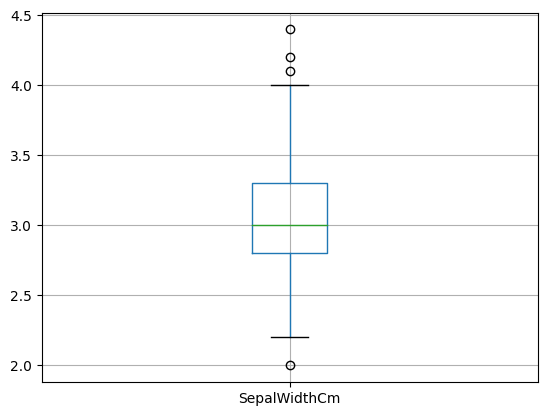

In [ ]:
df.boxplot(column='SepalWidthCm')

2. Frequency Table:
* divides the values of a variable into equally spaced segments
* tells us how many values fall within each segment

In [ ]:
frequency_table = df.copy()
frequency_table['freq']=pd.cut(df['PetalWidthCm'],5)
frequency_table.groupby('freq')['Species'].count().reset_index()

,freq,Species
0,"(0.0976, 0.58]",49
1,"(0.58, 1.06]",8
2,"(1.06, 1.54]",41
3,"(1.54, 2.02]",29
4,"(2.02, 2.5]",23


Note: In percentile (quartiles and deciles), the bin size will be different but the number of values in it will se same. In frequency table, the bin size will be the same but the number of values in it will be different.

3. Histogram:
* a plot of the frequency table with the bins ont he x axis and the counton the y axis
* a way to visualize frequency table



(array([49.,  8., 41., 29., 23.]),
 array([0.1 , 0.58, 1.06, 1.54, 2.02, 2.5 ]),
 <BarContainer object of 5 artists>)

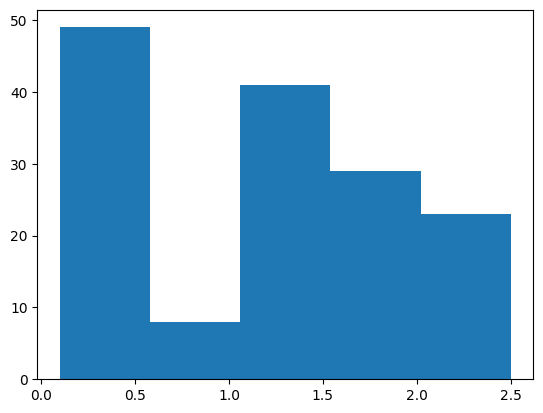

In [ ]:
plt.hist(x=df['PetalWidthCm'], bins=5)

###Statistical Moments###
* moments are a set of statistical parameters to measure a distribution.
* the first moment is location
* the second moment is variability
* the third moment is skewness of the data: degree of asymmetry, direction of the tail of the data
* the fourth moment is kurtosis : propensity of the data to have extreme values


4. Density plot:
* a smoothed version of the histogram
* often based on a kernel density estimate

Text(0.5, 0, 'Petal Width Cm')

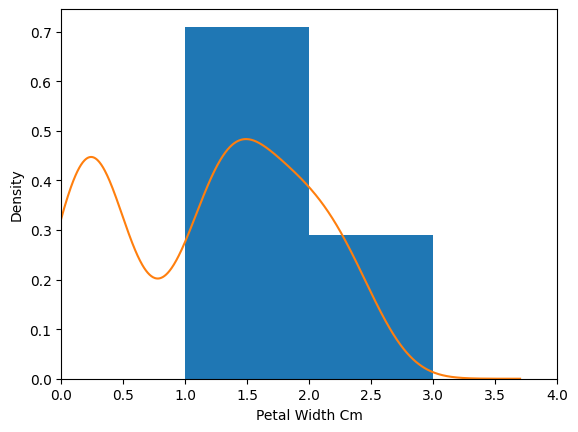

In [ ]:
ax = df['PetalWidthCm'].plot.hist(density=True, xlim=[0,4],bins=range(1,12))
df['PetalWidthCm'].plot.density(ax=ax)
ax.set_xlabel('Petal Width Cm')

##Exploring Binary and Categorical Data##
* Mode, Expected Value, Bar charts, Pie charts

1. Mode:
* value that appears the most often

In [ ]:
df['PetalWidthCm'].mode()

0    0.2
Name: PetalWidthCm, dtype: float64

2. Expected Value:
* sum of each value multiplied by the probability of occurence

3. Bar Charts:
* plots each value against its frequency or proportion as bars

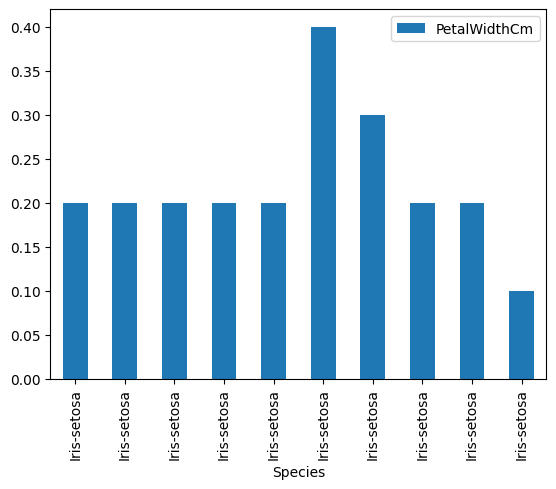

In [ ]:
ax= df.iloc[:10,:].plot.bar(x='Species',y='PetalWidthCm', )

4. Pie Charts:
* plots each value against its frequency or proportion as bars

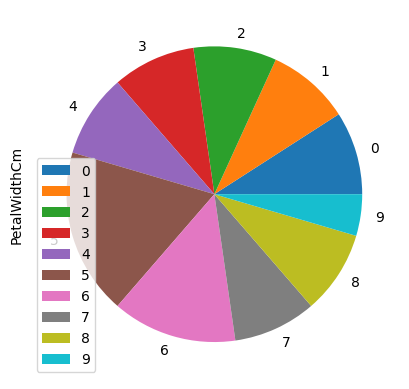

In [ ]:
ax= df.iloc[:10,:].plot.pie(y='PetalWidthCm' )

##Correlation##
* Variables X and Y are said to be positively correlated if high values of X go with high values of Y, and low values of X go with low values of Y.
* If high values of X go with low values of Y, and vice versa, the variables are negatively correlated.
* how one variable will change in relation to another variable


Correlation Coefficient:
* a metric that measures the extent to which numeric variables are associated with one another (-1 to +1)


Correlation matrix:
* a table where the variables are shown on both rows and columns, and the cell values are correlations between the varibales
* shows the correlation between all variables in a dataset

In [ ]:
df.corr()

<ipython-input-25-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


Scatterplot:
* a standard way to visualize the relationship between two measured data variable
* one variable is plotted on the x-axis and another on y-axis and each point on the graph is a record.

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

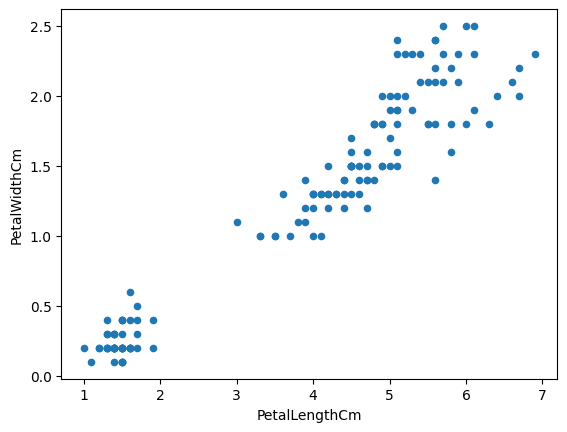

In [ ]:
df.plot.scatter(x='PetalLengthCm',y='PetalWidthCm')

Heatmap
* can be used to show graphical representation of correlation

<ipython-input-35-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

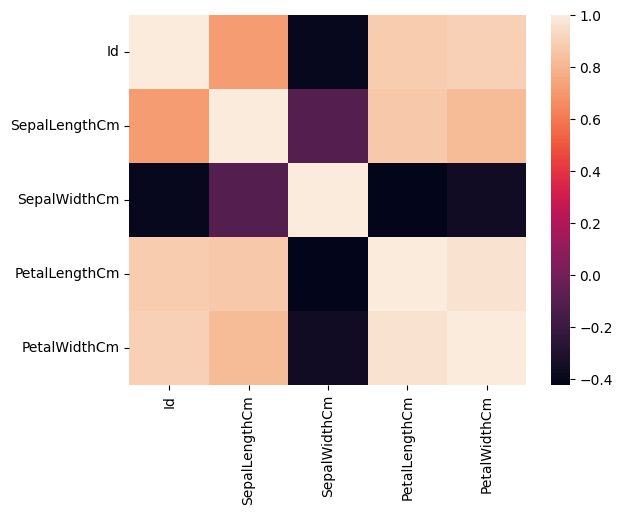

In [ ]:
sns.heatmap(df.corr())

Pearson's Correlation Coefficient:
* there is a need for a linear relationship between a pair of variables
* most common way of measuring a linear correlation
* it is a descriptive statistics / inferential statistics
* it describies the strength and direction of the linear relationship between two quantitative variables
* measure of how close the observation are to the line of best fit
* also tells you whether the slope of the line of best fit is negative or positive
* when to use:
  
  1. when both variables are quantitative
  2. variables are normally distributed
  3. the data has no outliers
  4. the relationship is linear

Spearman's Correlation Coefficient:
* measures the strength and direction of association between two ranked variables
* gives the measure of monotinicity of the relation between two variables
* when to use:

  1. the variables are ordinal
  2. the variables are not normally distributed
  3. the data includes outliers
  4. the relationship between the variables is non-linear and monotonic

Note:
Monotonic function: a function that either never increases or never decreases as its independent variable changes

##Exploring two or more variables##
* Contingency Table, Hexagonal Binning, Contour plot, Violin plot

Contingency Table:
* a tally of counts between two or more categorical variables
* count the number of instances of two variables within the dataset
* categorical vs categorical data

In [ ]:
crosstab = df.pivot_table(index='Species', columns = 'PetalLengthCm')
crosstab

Id                                                     \
PetalLengthCm     1.0   1.1   1.2        1.3        1.4        1.5   1.6   
Species                                                                    
Iris-setosa      23.0  14.0  25.5  31.714286  21.833333  24.714286  31.0   
Iris-versicolor   NaN   NaN   NaN        NaN        NaN        NaN   NaN   
Iris-virginica    NaN   NaN   NaN        NaN        NaN        NaN   NaN   

                                   ... SepalWidthCm                       \
PetalLengthCm     1.7   1.9   3.0  ...          5.7       5.8  5.9   6.0   
Species                            ...                                     
Iris-setosa      17.5  35.0   NaN  ...          NaN       NaN  NaN   NaN   
Iris-versicolor   NaN   NaN  99.0  ...          NaN       NaN  NaN   NaN   
Iris-virginica    NaN   NaN   NaN  ...     3.266667  2.833333  3.1  3.25   

                                                    
PetalLengthCm         6.1  6.3  6.4  6.6  6.7  6.9  
Species                                             
Iris-setosa           NaN  NaN  NaN  NaN  NaN  NaN  
Iris-versicolor       NaN  NaN  NaN  NaN  NaN  NaN  
Iris-virginica   3.133333  2.9  3.8  3.0  3.3  2.6  

[3 rows x 172 columns]

Hexagonal binning:
* plot of two numeric variables with the records binned into hexagons
* numeric vs numeric data

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

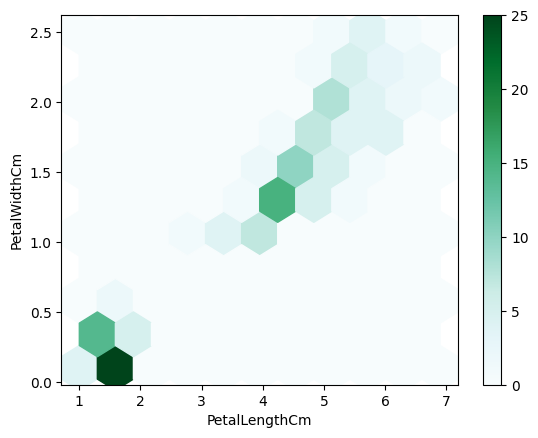

In [ ]:
df.plot.hexbin(x='PetalLengthCm',y='PetalWidthCm', gridsize=10)

Contour plot:
* a plot showing the density of two numerical variables like a topographical map
* adds a line to the top of the scatterplot

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

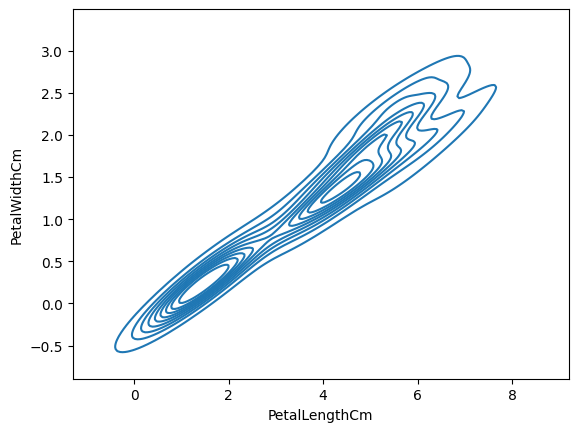

In [ ]:
ax = sns.kdeplot(data=df,x='PetalLengthCm', y='PetalWidthCm')
ax

Violin plot:
* similar to boxplot but shows the density estimate
* shows how many values are in each section
* categorical vs numerical data

<Axes: xlabel='PetalLengthCm'>

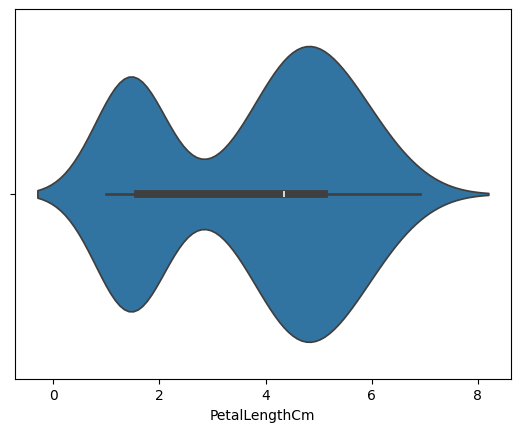

In [ ]:
sns.violinplot(data=df,x='PetalLengthCm')